<a href="https://colab.research.google.com/github/SaieshaBehal/SaieshaBehal/blob/main/Digit_Classification_using_MNIST_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INTRODUCTION**
It is a dataset of 60,000 small sqaure 28x28 pixel grayscale images of handwritten single digits between 0 and 9. The task is to classify a given image of a handwritten digit into one of the 10 classes representing integer values from 0 to 9, inclusively.

First, we are going to use Perceptron Classifier to classify (recognize) given digit images. Since a single perceptron could only be used for binary classification, We consider only two classes in the first half. Eventually we extend it to multi-class setting.
Suppose we want to recognize whether the given image is of digit zero or not(digit other than zero). Then the problem could be cast as a binary classification problem.

Second, we are going to use Logistic Regression (Despite it's name) to classify (recognize) given digit image. Again, we first apply the model for binary classification and then extend it to multiclass classification.

# **Perceptron Model**

1. **Binary Classifier**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import Perceptron
from sklearn.metrics import hinge_loss
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, precision_recall_curve
from sklearn.metrics import precision_score, recall_score, classification_report
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate, cross_val_predict, GridSearchCV

In [ ]:
# Data loading and Splitting
X, y = fetch_openml('mnist_784', return_X_y=True)
X = X.to_numpy()
y = y.to_numpy()

In [ ]:
target_names = np.unique(y)
print('Number of Samples: {0}, type: {1}'.format(X.shape[0], X.dtype))
print('Number of Features: {0}'.format(X.shape[1]))
print('Minimum: {0}, Maximum: {1}'.format(np.min(X), np.max(X)))
print('Number of Classes: {0}, type: {1}'.format(len(target_names), y.dtype))
print('Labels: {0}'.format(target_names))

Number of Samples: 70000, type: float64
Number of Features: 784
Minimum: 0.0, Maximum: 255.0
Number of Classes: 10, type: object
Labels: ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


In [ ]:
X = MinMaxScaler().fit_transform(X)
print('Minimum: {0}, Maximum: {1}'.format(np.min(X), np.max(X)))

Minimum: 0.0, Maximum: 1.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


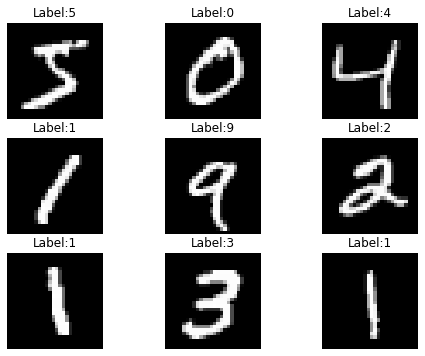

In [ ]:
num_images = 9
factor = np.int(np.sqrt(num_images))
fig, ax = plt.subplots(nrows=factor, ncols=factor, figsize=(8,6))
idx_offset = 0
for i in range(factor):
    index = idx_offset + i*(factor)
    for j in range(factor):
        ax[i,j].imshow(X[index+j].reshape(28,28),cmap='gray')
        ax[i,j].set_title('Label:{0}'.format(str(y[index+j])))
        ax[i,j].set_axis_off()

Since the samples in the dataset are already randomly shuffled, we need not shuffle it again. Therefore, using train_test_split() may be skipped.

In [ ]:
x_train, x_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

Before proceeding further, we will check whether the dataset is balanced or imbalanced

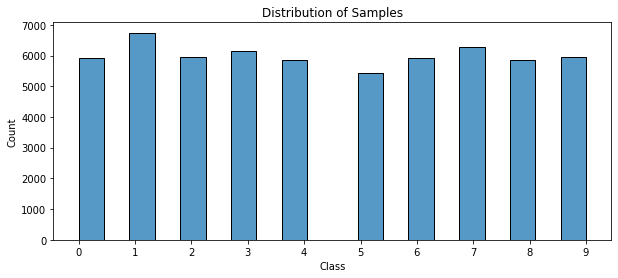

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,4))
sns.histplot(data=np.int8(y_train),binwidth=0.45, bins=11)
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9],labels=[0,1,2,3,4,5,6,7,8,9])
plt.xlabel('Class')
plt.title('Distribution of Samples')
plt.show()

Modifying labels from 10 classes to 2. Therefore, the label 0 will be changed to 1 and all other (1 to 9) will be changed to -1.

In [ ]:
# initialize new variable names with all -1
y_train_0 = -1*np.ones((len(y_train)))
y_test_0 = -1*np.ones((len(y_test)))

# finding indices of digit 0 image
indx_0 = np.where(y_train=='0')

# using the indices to modify y_train_0 and y_test_0
y_train_0[indx_0]=1
indx_0 = np.where(y_test=='0')
y_test_0[indx_0]=1

**Baseline Model** : the model always outputs the class which has the highest number of samples

In [ ]:
num_pos = len(np.where(y_train_0==1)[0])
num_neg = len(np.where(y_train_0==-1)[0])
print('Number of positive samples:', num_pos)
print('Number of negative samples:', num_neg)

Number of positive samples: 5923
Number of negative samples: 54077


In [ ]:
base_clf = DummyClassifier(strategy='most_frequent')
base_clf.fit(x_train, y_train_0)
print('Training accuracy:{0}'.format(base_clf.score(x_train, y_train_0)))
print('Testing accuracy: {0:}'.format(base_clf.score(x_test, y_test_0)))

Training accuracy:0.9012833333333333
Testing accuracy: 0.902


**Perceptron** **Model**

In [ ]:
bin_clf = Perceptron(max_iter=100)
bin_clf.fit(x_train,y_train_0)
print('Dimension of Weights w: {0}'.format(bin_clf.coef_.shape))
print('Bias: {0}'.format(bin_clf.intercept_))
print('The Loss Function:{0}'.format(bin_clf.loss_function_))

Dimension of Weights w: (1, 784)
Bias: [-96.]
The Loss Function:<sklearn.linear_model._sgd_fast.Hinge object at 0x7f872ed8b0d0>


In [ ]:
y_hat_train_0 = bin_clf.predict(x_train)
print('Training Accuracy:', bin_clf.score(x_train, y_train_0))
print('Testing Accuracy:', bin_clf.score(x_test, y_test_0))

Training Accuracy: 0.9866666666666667
Testing Accuracy: 0.9857


Displaying predictions: taking a few images from the test set at random and displaying it with the corresponding prediction

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


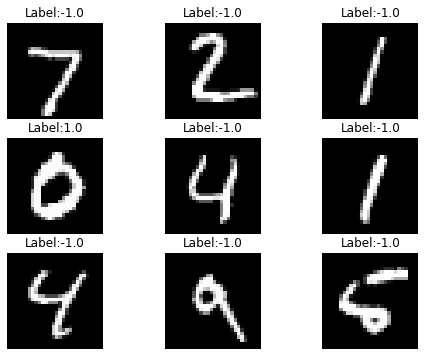

In [ ]:
y_hat_test_0 = bin_clf.predict(x_test)
num_images = 9
factor = np.int(np.sqrt(num_images))
fig, ax = plt.subplots(nrows=factor, ncols=factor, figsize=(8,6))
idx_offset = 0
for i in range(factor):
    index = idx_offset + i*(factor)
    for j in range(factor):
        ax[i,j].imshow(x_test[index+j].reshape(28,28),cmap='gray')
        ax[i,j].set_title('Label:{0}'.format(str(y_hat_test_0[index+j])))
        ax[i,j].set_axis_off()

In [ ]:
# checking how many 0's have been correctly predicted
indx_0 = np.where(y_test_0==1)
ZeroImgs = x_test[indx_0]
ZeroLabls = y_hat_test_0[indx_0]
num_misclassified = np.count_nonzero(ZeroLabls==-1)
num_correctpred = len(ZeroLabls)-num_misclassified
accuracy = num_correctpred/len(ZeroLabls)
print(accuracy)

0.8683673469387755


In [ ]:
# checking how many non-0's have been correctly predicted
idx_not_0 = np.where(y_test_0 == -1)[0]
NonZeroImgs = x_test[idx_not_0] 
NonZeroLabels = y_hat_test_0[idx_not_0]
num_misclassified = np.count_nonzero(NonZeroLabels == 1)
num_correctpred = len(NonZeroLabels) - num_misclassified
accuracy = num_correctpred / len(NonZeroLabels)
print(accuracy)

0.9984478935698448


Better Evaluation Metric: using 'accuracy' alone to measure the performance of the model is not suitable specially for imbalanced datasets

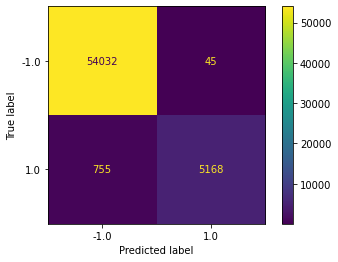

In [ ]:
y_hat_train_0 = bin_clf.predict(x_train)
cm_display = ConfusionMatrixDisplay.from_predictions(y_train_0, y_hat_train_0)
plt.show()

In [ ]:
cf_matrix = cm_display.confusion_matrix
tn=cf_matrix[0,0]
fn=cf_matrix[1,0]
fp=cf_matrix[0,1]
tp=cf_matrix[1,1]
precision = tp/(tp+fp)
recall = tp/(tp+fn)
accuracy = (tp+tn)/(tp+tn+fp+fn)
print('Precision:', precision)
print('Recall:', recall)
print('Accuracy:', accuracy)

Precision: 0.9913677345098791
Recall: 0.8725308120884687
Accuracy: 0.9866666666666667


Cross Validation : to know whether the model under consideration with the set hyperparameters is a good one for our given problem or not

In [ ]:
bin_clf = Perceptron(max_iter=100)
scores = cross_validate(bin_clf, x_train, y_train_0, cv=5, scoring=['precision', 'recall', 'f1'], return_estimator=True)
print(scores)

{'fit_time': array([0.98910737, 0.86662793, 1.48695064, 2.51493049, 2.25721693]), 'score_time': array([0.03980017, 0.04497719, 0.08842683, 0.07470798, 0.04255104]), 'estimator': [Perceptron(max_iter=100), Perceptron(max_iter=100), Perceptron(max_iter=100), Perceptron(max_iter=100), Perceptron(max_iter=100)], 'test_precision': array([0.96969697, 0.99271592, 0.98473282, 0.92320129, 0.88262195]), 'test_recall': array([0.91891892, 0.80574324, 0.87088608, 0.96371308, 0.97721519]), 'test_f1': array([0.94362533, 0.88951049, 0.92431706, 0.9430223 , 0.92751302])}


In [ ]:
print('f1, avg:{0:.2f}, std:{1:.3f}'.format(scores['test_f1'].mean(), scores['test_f1'].std()))
print('precision, avg:{0:.2f}, std:{1:.3f}'.format(scores['test_precision'].mean(), scores['test_precision'].std()))
print('recall, avg:{0:.2f}, std:{1:.3f}'.format(scores['test_recall'].mean(), scores['test_recall'].std()))

f1, avg:0.93, std:0.020
precision, avg:0.95, std:0.042
recall, avg:0.91, std:0.063


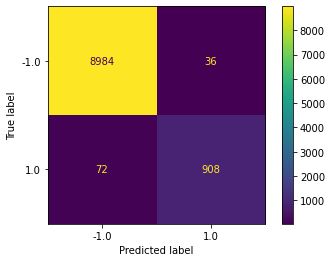

In [ ]:
# Picking the first estimator returned by the cross-validate function to check how it performs on the testset 
bin_clf = scores['estimator'][0]
y_hat_test_0 = bin_clf.predict(x_test)
cm_display = ConfusionMatrixDisplay.from_predictions(y_test_0, y_hat_test_0)

In [ ]:
print('Precision %.2f'%precision_score(y_test_0, y_hat_test_0))
print('Recall %.2f'%recall_score(y_test_0, y_hat_test_0))

Precision 0.96
Recall 0.93


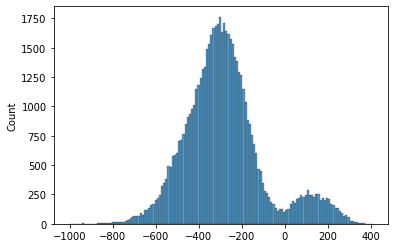

In [ ]:
#Often times we need to make a trade-off between precision and recall scores of a model
bin_clf = Perceptron(random_state=1729)
bin_clf.fit(x_train,y_train_0)
y_scores = bin_clf.decision_function(x_train)

sns.histplot(np.sort(y_scores))
plt.show()

The reason why there are so many negative values than the positive values is because of the class-imbalance in the dataset 

Suppose threshold takes the value of -600, then all the samples having score greater than -600 is set to 1(Positive label) and less than it is set to -1(neg label). Therefore, the number of False Positives will be increased. This will in turn reduce the precision score to a greater extent.

On the otherhand, if the threshold takes the value of say 400, Then, the number of False negatives will be increase and hence the recall will reduce to a greater extent.

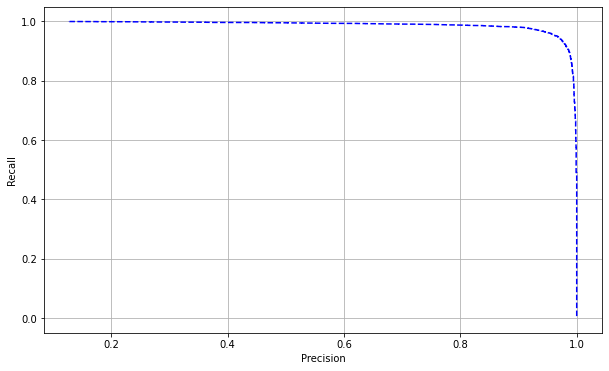

In [ ]:
precisions, recalls, thresholds = precision_recall_curve(y_train_0,y_scores,pos_label=1)
plt.figure(figsize=(10,6))
plt.plot(precisions[:-1],recalls[:-1],"b--")
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.grid(True)
plt.show()

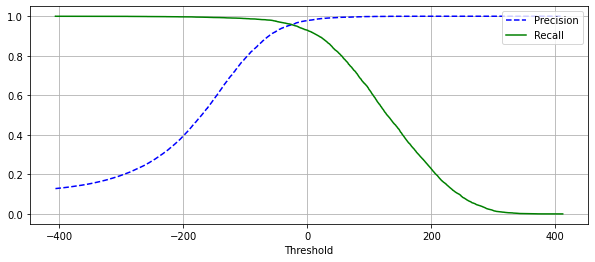

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(thresholds,precisions[:-1],"b--",label="Precision")
plt.plot(thresholds,recalls[:-1],"g-",label="Recall")
plt.xlabel('Threshold')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

In [ ]:
#get the index of threshold around zero 
idx_th = np.where(np.logical_and(thresholds >0, thresholds <1))
print("precision for zero threshold:",precisions[idx_th[0][0]])

precision for zero threshold: 0.9783072546230441


2. **Multiple Classifier (OneVsAll)**

We know that the perceptron is a binary classifier. However,MNIST dataset contains 10 classes. Then we can extend the idea to handle multi-class problem by combining multiple binary classifiers and devise a suitable scoring metric.

Sklearn does this by counting a number of unique elements (10 in this case) in the label vector y_train and converting labels using Labelbinarizer to fit each binary classifier 

In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import LabelBinarizer

In [ ]:
clf = Perceptron(random_state=1729)
y_train_ovr = LabelBinarizer().fit_transform(y_train)
for i in range(10):
  print("{0}:{1}".format(y_train[i],y_train_ovr[i]))

#Shape of the y_train_ovr will be of size (60000 x 10)
#The first column will be (binary) label vector for 0-detector and the next one for 1-Detector and so on.

5:[0 0 0 0 0 1 0 0 0 0]
0:[1 0 0 0 0 0 0 0 0 0]
4:[0 0 0 0 1 0 0 0 0 0]
1:[0 1 0 0 0 0 0 0 0 0]
9:[0 0 0 0 0 0 0 0 0 1]
2:[0 0 1 0 0 0 0 0 0 0]
1:[0 1 0 0 0 0 0 0 0 0]
3:[0 0 0 1 0 0 0 0 0 0]
1:[0 1 0 0 0 0 0 0 0 0]
4:[0 0 0 0 1 0 0 0 0 0]


In [ ]:
clf.fit(x_train,y_train)

NameError: ignored

What had actually happened internally was that the API automatically created 10 binary classifiers, converted labels to binary sparse matrix and trained them with the binarized labels.

During the inference time, the input will be passed through all these 10 classifiers and the highest score among the output from the classifiers will be considered as the predicted class.

In [ ]:
print ('Shape of Weight matrix: {0} and bias vector:{1}'.format(clf.coef_.shape, clf.intercept_.shape))

Shape of Weight matrix: (10, 784) and bias vector:(10,)


So it is a matrix of size (10 x 784), where each row represents the weights for a single binary classifier.

Important difference to note is that there is no signum function associated with the perceptron.

The class of a perceptron that outputs the maximum score for the input sample is considered as the predicted class.

In [ ]:
for i in range(10):
  scores = clf.decision_function(x_train[i].reshape(1,-1))
  #print("The predicted class:", np.argmax(scores))
  print("Predicted output:")
  print(clf.predict(x_train[i].reshape(1,-1)))

Predicted output:
['5']
Predicted output:
['0']
Predicted output:
['4']
Predicted output:
['1']
Predicted output:
['9']
Predicted output:
['2']
Predicted output:
['1']
Predicted output:
['3']
Predicted output:
['1']
Predicted output:
['4']


In [ ]:
# Get the prediction for all training samples
y_hat = clf.predict(x_train)
print(classification_report(y_train,y_hat))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97      5923
           1       0.94      0.98      0.96      6742
           2       0.89      0.90      0.90      5958
           3       0.86      0.87      0.87      6131
           4       0.89      0.94      0.91      5842
           5       0.81      0.88      0.85      5421
           6       0.92      0.97      0.94      5918
           7       0.91      0.94      0.92      6265
           8       0.92      0.77      0.84      5851
           9       0.92      0.82      0.87      5949

    accuracy                           0.90     60000
   macro avg       0.90      0.90      0.90     60000
weighted avg       0.91      0.90      0.90     60000



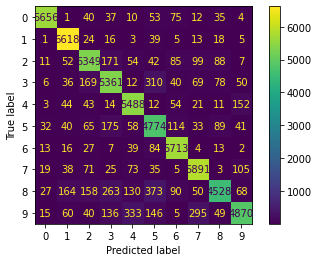

In [ ]:
cm_display = ConfusionMatrixDisplay.from_predictions(y_train,y_hat, values_format='.5g')

In [ ]:
#Let's create a pipeline to keep the code compact.
#The one potential preprocessing technique we may use is to scale the features within the range(0,1)
#Create a list with named tuples
estimators = [('std_scaler',MinMaxScaler()),('bin_clf',Perceptron())]
pipe = Pipeline(estimators)

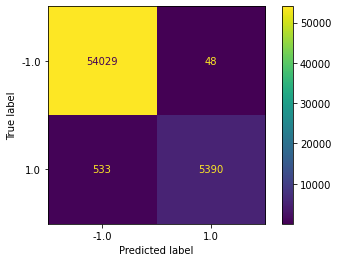

In [ ]:
pipe.fit(x_train,y_train_0)
y_hat_train_0=pipe.predict(x_train)
cm_display = ConfusionMatrixDisplay.from_predictions(y_train_0,y_hat_train_0,values_format='.5g')
plt.show()

In [ ]:
iterations =100 
bin_clf1 = Perceptron(max_iter=100,random_state=2094)
Loss_clf1=[]
for i in range(iterations):
  bin_clf1.partial_fit(x_train,y_train_0,classes=np.array([1,-1])) 
  y_hat_0 = bin_clf1.decision_function(x_train)
  Loss_clf1.append(hinge_loss(y_train_0,y_hat_0))

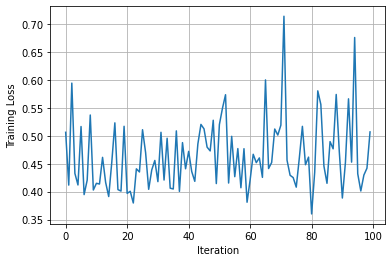

In [ ]:
plt.figure()
plt.plot(np.arange(iterations),Loss_clf1)
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('Training Loss')
plt.show()

Grid Search CV 

So, far we didn't do any hyperparameter tuning. We accepted the default value for learning rate of the Perceptron class.

Now, let us search for a better learning rate using GridSearchCV.

No matter what the learning rate is, the loss will never converge to zero as the classes are not linearly separable

In [ ]:
from sklearn.metrics import make_scorer
scoring = make_scorer(hinge_loss,greater_is_better=False)
lr_grid = [1/2**n for n in range(1,6)]
bin_clf_gscv = GridSearchCV(Perceptron(), param_grid={'eta0':lr_grid},scoring=scoring, cv=5)
bin_clf_gscv.fit(x_train,y_train_0)

GridSearchCV(cv=5, estimator=Perceptron(),
             param_grid={'eta0': [0.5, 0.25, 0.125, 0.0625, 0.03125]},
             scoring=make_scorer(hinge_loss, greater_is_better=False))

In [ ]:
print(bin_clf_gscv.cv_results_)
#The best learning rate has turned out to be : 0.125

{'mean_fit_time': array([1.11003919, 1.10735412, 1.05375762, 0.88546109, 0.81576352]), 'std_fit_time': array([0.29276234, 0.2904873 , 0.26383409, 0.12596164, 0.095855  ]), 'mean_score_time': array([0.0162569 , 0.01710286, 0.01664524, 0.01625333, 0.0175734 ]), 'std_score_time': array([0.00024566, 0.00179763, 0.00077808, 0.00032902, 0.00268042]), 'param_eta0': masked_array(data=[0.5, 0.25, 0.125, 0.0625, 0.03125],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'eta0': 0.5}, {'eta0': 0.25}, {'eta0': 0.125}, {'eta0': 0.0625}, {'eta0': 0.03125}], 'split0_test_score': array([-0.02166667, -0.02166667, -0.02166667, -0.02166667, -0.02166667]), 'split1_test_score': array([-0.0395, -0.0395, -0.0395, -0.0395, -0.0395]), 'split2_test_score': array([-0.02816667, -0.02816667, -0.02816667, -0.02816667, -0.02816667]), 'split3_test_score': array([-0.023     , -0.023     , -0.023     , -0.04416667, -0.04416667]), 'split4_test_score': a

In [ ]:
iterations =100
Loss = []
best_bin_clf = Perceptron(max_iter=1000,random_state=2094,eta0=0.125)
for i in range(iterations):
  best_bin_clf.partial_fit(x_train, y_train_0, classes=np.array([1,-1]))
  y_hat_0 = best_bin_clf.decision_function(x_train)
  Loss.append(hinge_loss(y_train_0,y_hat_0))

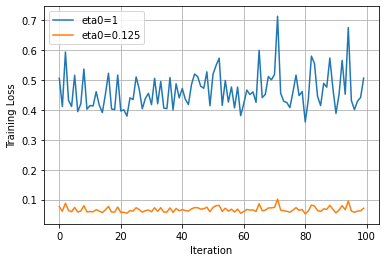

In [ ]:
# Comparing the loss with the before learning rate (et0=1) with the best learning rate found (et0=0.125)
plt.figure()
plt.plot(np.arange(iterations),Loss_clf1,label='eta0=1')
plt.plot(np.arange(iterations),Loss, label='eta0=0.125')
plt.grid(True)
plt.legend()
plt.xlabel("Iteration")
plt.ylabel("Training Loss")
plt.show()

In [ ]:
#Well, instead of instantiating a Perceptron class with a new learning rate and re-train the model, we could simply get the best_estimator from GridSearchCV as follows.
best_bin_clf = bin_clf_gscv.best_estimator_
print(best_bin_clf)

Perceptron(eta0=0.125)


# **Logistic** **Regression** **Model**
1. **Binary Classifier (Sigmoid Non-Linear Function)**

In [ ]:
# 1. Training with regularization 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.pipeline import make_pipeline 
from sklearn.dummy import DummyClassifier 
from sklearn.linear_model  import SGDClassifier, RidgeClassifier, LogisticRegression 
from sklearn.model_selection import cross_validate, RandomizedSearchCV, cross_val_predict 
from sklearn.metrics import log_loss # log loss is also known as cross entropy loss 
from sklearn.metrics import ConfusionMatrixDisplay 
from sklearn.metrics import precision_score, recall_score, classification_report 
from sklearn.metrics import precision_recall_curve 
from sklearn.metrics import roc_curve, roc_auc_score 

In [ ]:
bin_sgd_clf =SGDClassifier(loss='log',
                           penalty='l2',
                           warm_start=True,
                           eta0=0.01,
                           alpha=0,
                           learning_rate='constant',
                           random_state=1729)
Loss=[] 
iterations=100
for i in range(iterations):
  bin_sgd_clf.fit(x_train,y_train_0)
  y_pred=bin_sgd_clf.predict_proba(x_train)
  Loss.append(log_loss(y_train_0,y_pred))

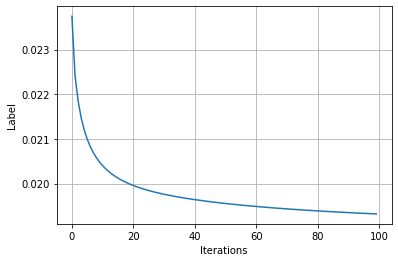

In [ ]:
plt.figure() 
plt.plot(np.arange(iterations),Loss)
plt.grid(True)
plt.xlabel('Iterations')
plt.ylabel('Label') 
plt.show()

In [ ]:
print('Training accuracy:{0:.2f}'.format(bin_sgd_clf.score(x_train,y_train_0)))
print('Testing accuracy{0:.2f}'.format(bin_sgd_clf.score(x_test,y_test_0)))

Training accuracy:0.99
Testing accuracy0.99


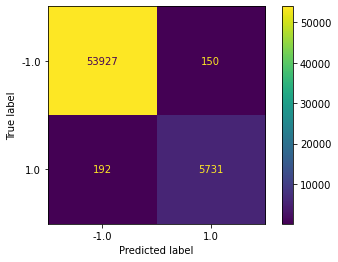

In [ ]:
y_hat_train_0 = bin_sgd_clf.predict(x_train)
cm_display = ConfusionMatrixDisplay.from_predictions(y_train_0,y_hat_train_0,values_format='.5g')
plt.show()

In [ ]:
print(classification_report(y_train_0,y_hat_train_0))

              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00     54077
         1.0       0.97      0.97      0.97      5923

    accuracy                           0.99     60000
   macro avg       0.99      0.98      0.98     60000
weighted avg       0.99      0.99      0.99     60000



In [ ]:
# Cross validation : to check for the generalisation ability of the model
estimator = SGDClassifier(loss='log',
                          penalty='l2',
                          max_iter=100,
                          warm_start=False,
                          eta0=0.01,
                          alpha=0,
                          learning_rate='constant',
                          random_state=1729)

In [ ]:
cv_bin_clf = cross_validate(estimator,x_train,y_train_0,cv=5,
                            scoring=['precision','recall','f1'],
                            return_train_score=True,
                            return_estimator=True)
print(cv_bin_clf)

{'fit_time': array([1.9669137 , 1.34484291, 1.34596038, 1.47639799, 1.20033097]), 'score_time': array([0.03928876, 0.04569411, 0.03961897, 0.03909349, 0.04083204]), 'estimator': [SGDClassifier(alpha=0, eta0=0.01, learning_rate='constant', loss='log',
              max_iter=100, random_state=1729), SGDClassifier(alpha=0, eta0=0.01, learning_rate='constant', loss='log',
              max_iter=100, random_state=1729), SGDClassifier(alpha=0, eta0=0.01, learning_rate='constant', loss='log',
              max_iter=100, random_state=1729), SGDClassifier(alpha=0, eta0=0.01, learning_rate='constant', loss='log',
              max_iter=100, random_state=1729), SGDClassifier(alpha=0, eta0=0.01, learning_rate='constant', loss='log',
              max_iter=100, random_state=1729)], 'test_precision': array([0.95538721, 0.96382429, 0.97238999, 0.96735395, 0.95952782]), 'train_precision': array([0.97419355, 0.97321046, 0.96473818, 0.97701149, 0.96404399]), 'test_recall': array([0.95861486, 0.94510135,

From the above result, we can see that Logistic Regression is better than the perceptron

Hyper-parameter Tuning

We have to use cross-validate folds and mesure the same metrics across these folds for different values of hyper-parameters.

Logistic regression uses sgd solver and hence the learning rate and regularization rate are two important hyper-parameters.

For the moment, we skip penalizing the parameters of the model and just search for a better learning rate using `RandomizedSearchCV().

In [ ]:
estimator=SGDClassifier(loss='log',
                        penalty='l2',
                        max_iter=1,
                        warm_start=True, 
                        eta0=0.01,
                        alpha=0,
                        learning_rate='constant',
                        random_state=1729)

In [ ]:
scores = RandomizedSearchCV(estimator,
                            param_distributions={'eta0':lr_grid},
                            cv=5,
                            scoring=['precision','recall','f1'],
                            n_iter=5,
                            refit='f1')

In [ ]:
scores.fit(x_train,y_train_0)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_mo

RandomizedSearchCV(cv=5,
                   estimator=SGDClassifier(alpha=0, eta0=0.01,
                                           learning_rate='constant', loss='log',
                                           max_iter=1, random_state=1729,
                                           warm_start=True),
                   n_iter=5,
                   param_distributions={'eta0': [0.5, 0.25, 0.125, 0.0625,
                                                 0.03125]},
                   refit='f1', scoring=['precision', 'recall', 'f1'])

In [ ]:
best_bin_clf = scores.best_estimator_

In [ ]:
y_hat_train_best_0 = best_bin_clf.predict(x_train)

In [ ]:
print(classification_report(y_train_0, y_hat_train_best_0))

              precision    recall  f1-score   support

        -1.0       0.99      1.00      0.99     54077
         1.0       0.99      0.88      0.93      5923

    accuracy                           0.99     60000
   macro avg       0.99      0.94      0.96     60000
weighted avg       0.99      0.99      0.99     60000



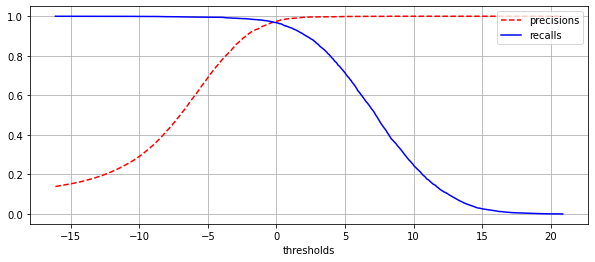

In [ ]:
# Precision-Recall Trade Off
y_scores = bin_sgd_clf.decision_function(x_train)
precisions, recalls, thresholds = precision_recall_curve(y_train_0,y_scores)
plt.figure(figsize=(10,4)) 
plt.plot(thresholds,precisions[:-1],'r--',label='precisions')
plt.plot(thresholds,recalls[:-1],'b-',label='recalls')
plt.legend(loc='upper right')
plt.grid(True)
plt.xlabel('thresholds')
plt.show()

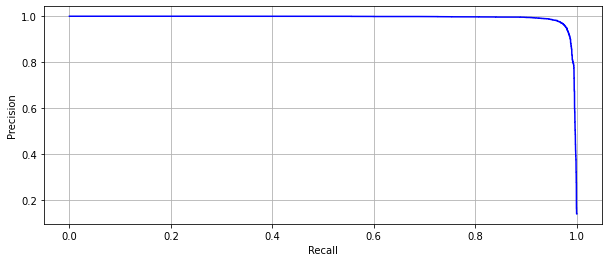

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(recalls[:-1],precisions[:-1], 'b-')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.show()

2. **Multi Classifier (Soft-max Regression)**

In [ ]:
import numpy as np 
from pprint import pprint 
#to make this notebook's output stable across runs 
np.random.seed(42) 

from sklearn.datasets import fetch_openml 
from sklearn.preprocessing import StandardScaler 

from sklearn.pipeline import Pipeline 

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV 

from sklearn.metrics import ConfusionMatrixDisplay 
from sklearn.metrics import classification_report 
from sklearn.metrics import f1_score 
from sklearn.metrics import make_scorer 

import matplotlib.pyplot as plt 
import matplotlib as mpl 
import seaborn as sns 

In [ ]:
X,y = fetch_openml('mnist_784',return_X_y=True, version=1)

#Training test split 
X = X.to_numpy() 
y = y.to_numpy() 
x_train,x_test,y_train, y_test = X[:60000],X[60000:],y[:60000],y[60000:]

In [ ]:
pipe = Pipeline([('scaler',StandardScaler()),
                 ('logreg',LogisticRegression(multi_class='multinomial',solver='sag'))]) 
pipe.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg',
                 LogisticRegression(multi_class='multinomial', solver='sag'))])

In [ ]:
print('Training Accuracy:',pipe.score(x_train,y_train))
print('Testing Accuracy:',pipe.score(x_test,y_test))

Training Accuracy: 0.9304833333333333
Testing Accuracy: 0.9246


In [ ]:
print(pipe[-1].intercept_)
print(pipe[-1].classes_)

[-0.25685025 -0.49027215  0.23085592  0.24481755 -0.32790419  0.30847999
 -0.20061639 -0.25981866  0.70651021  0.04479797]
['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


In [ ]:
y_pred = pipe.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.96      0.98      0.97      1135
           2       0.94      0.90      0.92      1032
           3       0.91      0.91      0.91      1010
           4       0.92      0.94      0.93       982
           5       0.91      0.87      0.89       892
           6       0.93      0.95      0.94       958
           7       0.92      0.93      0.92      1028
           8       0.88      0.88      0.88       974
           9       0.91      0.91      0.91      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



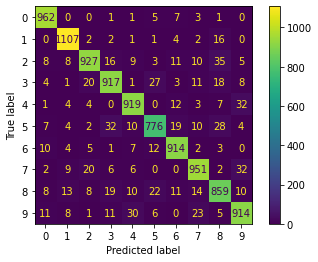

In [ ]:
cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)